In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import kstest
from subprocess import check_output
import matplotlib.colors as colors

In [2]:
df = []
for i in range(7):
	stdout = check_output(["node", "gaussian.mjs", f"{10 ** (i + 1)}"]).decode("utf-8")
	# print(stdout)
	data = list(map(float, stdout.split('\n')[:-1]))
	# print(data)
	df.append(DataFrame(data=data, columns=["x"]))

In [3]:
for i in range(7):
	print(kstest(df[i]["x"], "norm").pvalue)

0.7352770833339793
0.5420987966152406
0.7049529637519545
0.6347968456875975
0.688604646073105
0.7432397740002221
0.24930949778048173


Text(0, 0.5, '$P(X = x)$')

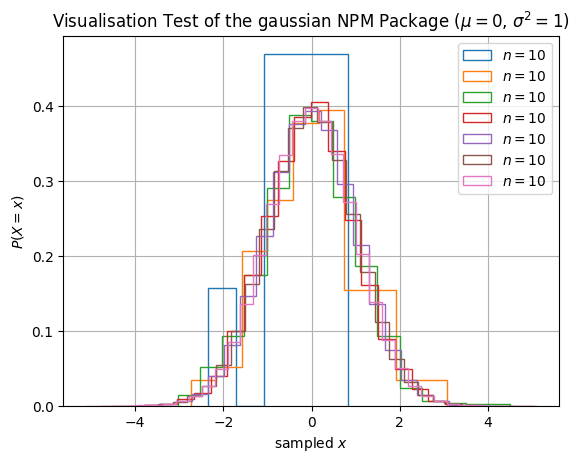

In [4]:
color_options = list(colors.TABLEAU_COLORS.keys())
for i in range(7):
	plt.hist(df[i], ec=color_options[i], bins=5 * (i + 1), density=True, histtype="step", label="$n = 10$")
plt.legend()
plt.grid(True)
plt.title("Visualisation Test of the gaussian NPM Package ($\mu = 0$, $\sigma^2 = 1$)")
plt.xlabel("sampled $x$")
plt.ylabel("$P(X = x)$")